<a href="https://colab.research.google.com/github/malekeechaker/Data_Cleaning/blob/main/Data_Cleaning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


telecharger la dataset:

In [ ]:
house_data= pd.read_csv("house_prices.csv")

# **Explication de la dataset**

la dataset concerne des propriétés immobilières, contenant des informations sur les caractéristiques des maisons, leurs finitions, les équipements, ainsi que des données sur les ventes, comme le prix de vente et les conditions de vente. Elle est fréquemment utilisée pour des analyses prédictives ou des études sur le marché immobilier.

# **L'importance de traitement des données manquantes**

Traiter les valeurs manquantes est crucial pour maintenir l'intégrité des analyses et des modèles prédictifs, car les données incomplètes peuvent introduire des biais ou mener à des résultats erronés. Ignorer les valeurs manquantes peut également réduire la précision des modèles et entraver les prises de décisions basées sur les données.

In [ ]:
house_data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
house_data.shape

(1460, 81)

In [ ]:
house_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **Explication des colonnes**

**Id** : Un identifiant unique pour chaque maison (type entier).

**MSSubClass** : Type de classe de bâtiment (type entier).

**MSZoning** : Zone de classification de la propriété (type chaîne).

**LotFrontage** : Longueur de la façade du terrain en pieds (type entier).
**LotArea** : Surface totale du terrain en pieds carrés (type entier).

**Street** : Type de rue (par exemple, pavée ou non pavée) (type chaîne).
**Alley** : Type d'allée (NA si aucun) (type chaîne).

**LotShape** : Forme du terrain (type chaîne).
**LandContour** : Contour du terrain (type chaîne).
**Utilities** : Types de services publics disponibles (type chaîne).
**LotConfig** : Configuration du terrain (type chaîne).
**LandSlope** : Pente du terrain (type chaîne).

**Neighborhood** : Nom du quartier (type chaîne).

**Condition1** : Proximité à diverses conditions (type chaîne).
**Condition2** : Proximité à d'autres conditions secondaires (type chaîne).

**BldgType** : Type de bâtiment (par exemple, 1Fam pour une maison unifamiliale) (type chaîne).
**HouseStyle** : Style de la maison (type chaîne).

**OverallQual** : Note globale de la qualité des matériaux et de la finition (type
entier).
**OverallCond** : Note globale de la condition du bâtiment (type entier).
**YearBuilt** : Année de construction de la maison (type entier).
**YearRemodAdd** : Année de la dernière rénovation ou addition (type entier).

**RoofStyle** : Style du toit (type chaîne).
**RoofMatl** : Matériau du toit (type chaîne).

**Exterior1st** : Type de matériau de revêtement extérieur (type chaîne).
**Exterior2nd** : Deuxième type de matériau de revêtement extérieur (si différent du premier) (type chaîne).

**MasVnrType** : Type de revêtement en maçonnerie (type chaîne).
**MasVnrArea** : Surface du revêtement en maçonnerie en pieds carrés (type entier ou flottant).

**ExterQual** : Qualité des matériaux extérieurs (type chaîne).
**ExterCond** : Condition des matériaux extérieurs (type chaîne).

**Foundation** : Type de fondation (type chaîne).

**BsmtQual** : Qualité du sous-sol (type chaîne).
**BsmtCond** : Condition du sous-sol (type chaîne).
**BsmtExposure** : Niveau d'exposition du sous-sol (type chaîne).
**BsmtFinType1** : Type de finition du sous-sol 1 (type chaîne).
**BsmtFinSF1** : Superficie finie du sous-sol 1 en pieds carrés (type entier).
**BsmtFinType2** : Type de finition du sous-sol 2 (type chaîne).
**BsmtFinSF2** : Superficie finie du sous-sol 2 en pieds carrés (type entier).
**BsmtUnfSF** : Superficie non finie du sous-sol en pieds carrés (type entier).
**TotalBsmtSF** : Superficie totale du sous-sol (finie + non finie) en pieds carrés (type entier).

**Heating** : Type de chauffage (type chaîne).
**HeatingQC** : Qualité du chauffage (type chaîne).
**CentralAir** : Climatiseur central (Oui/Non) (type chaîne).

**Electrical** : Type de système électrique (type chaîne).

**1stFlrSF** : Superficie du premier étage en pieds carrés (type entier).
**2ndFlrSF** : Superficie du deuxième étage en pieds carrés (type entier).

**LowQualFinSF** : Superficie de finitions de qualité inférieure en pieds carrés (type entier).

**GrLivArea** : Superficie totale habitable au-dessus du sous-sol en pieds carrés (type entier).

**BsmtFullBath** : Nombre de salles de bain complètes au sous-sol (type entier).
**BsmtHalfBath** : Nombre de demi-salles de bain au sous-sol (type entier).
**FullBath** : Nombre de salles de bain complètes à l'étage principal (type entier).
**HalfBath** : Nombre de demi-salles de bain à l'étage principal (type entier).

**BedroomAbvGr** : Nombre de chambres au-dessus du sous-sol (type entier).

**KitchenAbvGr** : Nombre de cuisines au-dessus du sous-sol (type entier).
**KitchenQual** : Qualité de la cuisine (type chaîne).

**TotRmsAbvGrd** : Total des pièces au-dessus du sous-sol (type entier).

**Functional** : Fonctionnalité de la maison (type chaîne).

**Fireplaces** : Nombre de cheminées (type entier).
**FireplaceQu** : Qualité des cheminées (type chaîne).

**GarageType** : Type de garage (type chaîne).
**GarageYrBlt** : Année de construction du garage (type entier).
**GarageFinish** : Niveau de finition du garage (type chaîne).
**GarageCars** : Capacité du garage en termes de voitures (type entier).
**GarageArea** : Superficie du garage en pieds carrés (type entier).
**GarageQual** : Qualité du garage (type chaîne).
**GarageCond** : Condition du garage (type chaîne).

**PavedDrive** : Allée pavée ou non (type chaîne).

**WoodDeckSF** : Superficie du deck en bois en pieds carrés (type entier).

**OpenPorchSF** : Superficie de la véranda ouverte en pieds carrés (type entier).
**EnclosedPorch** : Superficie de la véranda fermée en pieds carrés (type entier).
**3SsnPorch** : Superficie de la véranda 3 saisons en pieds carrés (type entier).
**ScreenPorch** : Superficie de la véranda avec moustiquaire en pieds carrés (type entier).

**PoolArea** : Superficie de la piscine en pieds carrés (type entier).
**PoolQC** : Qualité de la piscine (type chaîne).

**Fence** : Type de clôture (type chaîne).

**MiscFeature** : Fonctionnalité diverse (type chaîne).
**MiscVal** : Valeur de la fonctionnalité diverse (type entier).

**MoSold** : Mois de la vente (type entier).
**YrSold** : Année de la vente (type entier).

**SaleType** : Type de vente (type chaîne).
**SaleCondition** : Condition de vente (type chaîne).

**SalePrice** : Prix de vente (type entier).

**voir le pourcentage de valeurs nulls pour chaque colonne**

In [ ]:
null_var=house_data.isnull().sum().sort_values(ascending=False)
for i in range(len(house_data.columns)):
  print(null_var.index[i],"   :",null_var[i] / 1460)

PoolQC    : 0.9952054794520548
MiscFeature    : 0.963013698630137
Alley    : 0.9376712328767123
Fence    : 0.8075342465753425
MasVnrType    : 0.5972602739726027
FireplaceQu    : 0.4726027397260274
LotFrontage    : 0.1773972602739726
GarageYrBlt    : 0.05547945205479452
GarageCond    : 0.05547945205479452
GarageType    : 0.05547945205479452
GarageFinish    : 0.05547945205479452
GarageQual    : 0.05547945205479452
BsmtFinType2    : 0.026027397260273973
BsmtExposure    : 0.026027397260273973
BsmtQual    : 0.025342465753424658
BsmtCond    : 0.025342465753424658
BsmtFinType1    : 0.025342465753424658
MasVnrArea    : 0.005479452054794521
Electrical    : 0.0006849315068493151
Id    : 0.0
Functional    : 0.0
Fireplaces    : 0.0
KitchenQual    : 0.0
KitchenAbvGr    : 0.0
BedroomAbvGr    : 0.0
HalfBath    : 0.0
FullBath    : 0.0
BsmtHalfBath    : 0.0
TotRmsAbvGrd    : 0.0
GarageCars    : 0.0
GrLivArea    : 0.0
GarageArea    : 0.0
PavedDrive    : 0.0
WoodDeckSF    : 0.0
OpenPorchSF    : 0.0
Enclo

on peut supprimer les colonnes: "PoolQC"(la qualité de la piscine), "MiscFeature"(fonctionnalités supplémentaires), "Alley"(une allée à l'arrière, et son type) et "Fence"( le type de clôture) ayant plus que 80% des valeurs nulls

In [ ]:
house_data.drop(columns=['PoolQC', 'MiscFeature', 'Alley', 'Fence'], inplace=True)


**voir les lignes redoublantes**

In [ ]:
print("Nombre de lignes redoublantes:",house_data.duplicated().sum())

Nombre de lignes redoublantes: 0


**voir les lignes avec plus que 70% nulls**

In [ ]:

df_null_percentage = house_data.isnull().mean(axis=1)

threshold=0.7
lines_with_many_nulls = df_null_percentage >= threshold

print("Nombre de lignes avec 70% ou plus de données nulles:", lines_with_many_nulls.sum())


Nombre de lignes avec 70% ou plus de données nulles: 0


In [ ]:
house_data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Traitement des valeurs manquantes**

In [ ]:
null_col=[]
null_var=house_data.isnull().sum().sort_values(ascending=False)
for i in range(len(house_data.columns)):
  if(null_var[i]!=0):
    null_col.append(null_var.index[i])
    print(null_var.index[i],"   :",null_var[i])

MasVnrType    : 872
FireplaceQu    : 690
LotFrontage    : 259
GarageCond    : 81
GarageYrBlt    : 81
GarageFinish    : 81
GarageQual    : 81
GarageType    : 81
BsmtFinType2    : 38
BsmtExposure    : 38
BsmtFinType1    : 37
BsmtCond    : 37
BsmtQual    : 37
MasVnrArea    : 8
Electrical    : 1


In [ ]:
house_data[null_col].head(10)

,MasVnrType,FireplaceQu,LotFrontage,GarageCond,GarageYrBlt,GarageFinish,GarageQual,GarageType,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,Electrical
0,BrkFace,NaN,65.0,TA,2003.0,RFn,TA,Attchd,Unf,No,GLQ,TA,Gd,196.0,SBrkr
1,NaN,TA,80.0,TA,1976.0,RFn,TA,Attchd,Unf,Gd,ALQ,TA,Gd,0.0,SBrkr
2,BrkFace,TA,68.0,TA,2001.0,RFn,TA,Attchd,Unf,Mn,GLQ,TA,Gd,162.0,SBrkr
3,NaN,Gd,60.0,TA,1998.0,Unf,TA,Detchd,Unf,No,ALQ,Gd,TA,0.0,SBrkr
4,BrkFace,TA,84.0,TA,2000.0,RFn,TA,Attchd,Unf,Av,GLQ,TA,Gd,350.0,SBrkr
5,NaN,NaN,85.0,TA,1993.0,Unf,TA,Attchd,Unf,No,GLQ,TA,Gd,0.0,SBrkr
6,Stone,Gd,75.0,TA,2004.0,RFn,TA,Attchd,Unf,Av,GLQ,TA,Ex,186.0,SBrkr
7,Stone,TA,NaN,TA,1973.0,RFn,TA,Attchd,BLQ,Mn,ALQ,TA,Gd,240.0,SBrkr
8,NaN,TA,51.0,TA,1931.0,Unf,Fa,Detchd,Unf,No,Unf,TA,TA,0.0,FuseF
9,NaN,TA,50.0,TA,1939.0,RFn,Gd,Attchd,Unf,No,GLQ,TA,TA,0.0,SBrkr


# **les valeurs manquantes pour les colonnes categoriques**

on remplace les valeurs manquantes par le mode

In [ ]:
house_data["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [ ]:
house_data.fillna({"MasVnrType":"BrkFace"},inplace=True)

In [ ]:
house_data["MasVnrType"].value_counts()

MasVnrType
BrkFace    1317
Stone       128
BrkCmn       15
Name: count, dtype: int64

In [ ]:
house_data["FireplaceQu"].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [ ]:
house_data.fillna({"FireplaceQu":"Gd"},inplace=True)

In [ ]:
house_data["GarageCond"].value_counts()

GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [ ]:
house_data.fillna({"GarageCond":"TA"},inplace=True)

In [ ]:
house_data["GarageFinish"].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

In [ ]:
house_data.fillna({"GarageFinish":"Unf"},inplace=True)

In [ ]:
house_data["GarageQual"].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [ ]:
house_data.fillna({"GarageQual":"TA"},inplace=True)

In [ ]:
house_data["GarageType"].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [ ]:
house_data.fillna({"GarageType":"Attchd"},inplace=True)

In [ ]:
house_data["BsmtFinType2"].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [ ]:
house_data.fillna({"BsmtFinType2":"Unf"},inplace=True)

In [ ]:
house_data["BsmtExposure"].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [ ]:
house_data.fillna({"BsmtExposure":"No"},inplace=True)

In [ ]:
house_data["BsmtFinType1"].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64

In [ ]:
house_data.fillna({"BsmtFinType1":"Unf"},inplace=True)

In [ ]:
house_data["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64

In [ ]:
house_data.fillna({"BsmtCond":"TA"},inplace=True)

In [ ]:
house_data["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [ ]:
house_data.fillna({"BsmtQual":"TA"},inplace=True)

In [ ]:
house_data["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [ ]:
house_data.fillna({"Electrical":"SBrkr"},inplace=True)

In [ ]:
null_col=[]
null_var=house_data.isnull().sum().sort_values(ascending=False)
for i in range(len(house_data.columns)):
  if(null_var[i]!=0):
    null_col.append(null_var.index[i])
    print(null_var.index[i],"   :",null_var[i])

LotFrontage    : 259
GarageYrBlt    : 81
MasVnrArea    : 8


# **les valeurs manquantes pour les colonnes numeriques**

<Axes: >

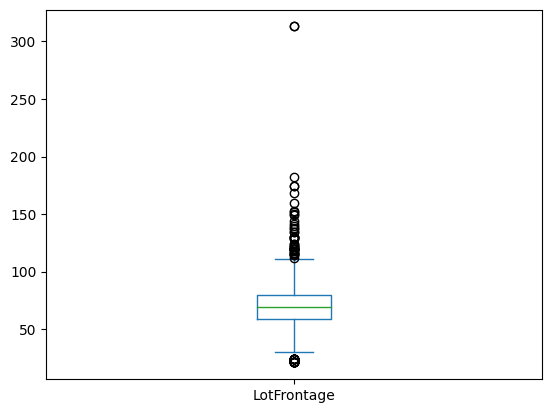

In [ ]:
house_data["LotFrontage"].plot(kind="box")

on remarque qu'il ya une valeur aberente. Si on va remplacer avec le moyenne, il est prefairable de la supprimer avant.

In [ ]:
house_data[house_data["LotFrontage"].isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,...,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,...,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2010,WD,Normal,154000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1429,1430,20,RL,NaN,12546,Pave,IR1,Lvl,AllPub,Corner,...,99,0,0,0,0,4,2007,WD,Normal,182900
1431,1432,120,RL,NaN,4928,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,10,2009,WD,Normal,143750
1441,1442,120,RM,NaN,4426,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,5,2008,WD,Normal,149300
1443,1444,30,RL,NaN,8854,Pave,Reg,Lvl,AllPub,Inside,...,0,0,40,0,0,5,2009,WD,Normal,121000


pas de lignes ayant plusieurs valeurs manquante car deja on a seulement 3 colonnes avec des valeurs manquantes

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

house_data_numeric = house_data.select_dtypes(include=[np.number])
correlation_matrix = house_data_numeric.corr()

for i in range(len(correlation_matrix["LotFrontage"])):
  if correlation_matrix["LotFrontage"][i]>=0.3:
    print (correlation_matrix["LotFrontage"].index[i], correlation_matrix["LotFrontage"][i])

LotFrontage 1.0
LotArea 0.4260950187718081
TotalBsmtSF 0.3920745763791721
1stFlrSF 0.45718100199465517
GrLivArea 0.40279741408531955
TotRmsAbvGrd 0.3520959476602243
GarageArea 0.3449967241064819
SalePrice 0.35179909657067737


pas de correlation tres grande ou significative

In [ ]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
high_frontage = house_data[house_data["LotFrontage"] > 300]
high_frontage


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
934,935,20,RL,313.0,27650,Pave,IR2,HLS,AllPub,Inside,...,0,0,0,0,0,11,2008,WD,Normal,242000
1298,1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,...,0,0,0,480,0,1,2008,New,Partial,160000


In [ ]:
house_data.drop(high_frontage.index, inplace=True)

In [ ]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1458.000000,1458.000000,1199.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1450.000000,1458.000000,...,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,729.969822,56.920439,69.644704,10468.471879,6.096022,5.574760,1971.250343,1984.834705,103.279310,440.085734,...,94.227023,46.524005,21.984225,3.414266,15.081619,2.433471,43.548697,6.322359,2007.815501,180893.652949
std,421.601941,42.318471,22.181762,9879.455077,1.379962,1.112835,30.206855,20.642513,180.254984,435.587982,...,125.361232,65.977740,61.155666,29.337173,55.792877,38.209947,496.460799,2.699105,1.328989,79479.008386
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.250000,20.000000,59.000000,7544.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129925.000000
50%,729.500000,50.000000,69.000000,9475.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,382.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.750000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,165.750000,712.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,182.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


on remarque que le mean et le median devient plus proche apres la suppression des valeurs aberentes

In [ ]:
house_data.fillna({"LotFrontage":69.00},inplace=True)

In [ ]:
null_col=[]
null_var=house_data.isnull().sum().sort_values(ascending=False)
for i in range(len(house_data.columns)):
  if(null_var[i]!=0):
    null_col.append(null_var.index[i])
    print(null_var.index[i],"   :",null_var[i])

GarageYrBlt    : 81
MasVnrArea    : 8


<Axes: >

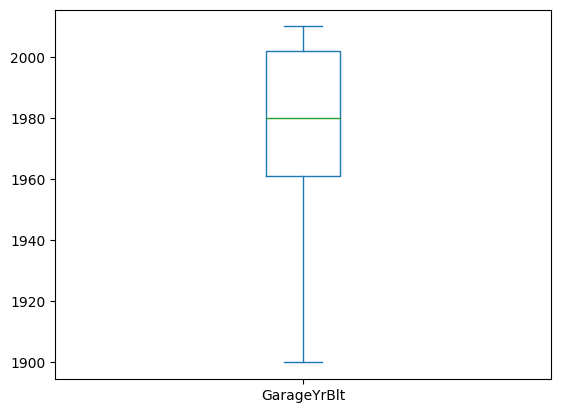

In [ ]:
house_data["GarageYrBlt"].plot(kind="box")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

house_data_numeric = house_data.select_dtypes(include=[np.number])
correlation_matrix = house_data_numeric.corr()

for i in range(len(correlation_matrix["GarageYrBlt"])):
  if correlation_matrix["GarageYrBlt"][i]>=0.5:
    print (correlation_matrix["GarageYrBlt"].index[i], correlation_matrix["GarageYrBlt"][i])

OverallQual 0.5477037255675872
YearBuilt 0.8254736619113098
YearRemodAdd 0.6429016917375286
GarageYrBlt 1.0
GarageCars 0.5892971555060526
GarageArea 0.5657361281043706


on remarque une grande correlation entre la "GarageYrBlt" et "YearBuilt" donc on peut utiliser une regression pour remplir les valeurs nulls de "GarageYrBlt"

In [ ]:
X_train = house_data[~(house_data["GarageYrBlt"].isnull())]["YearBuilt"].values.reshape(-1, 1)
y_train = house_data[~(house_data["GarageYrBlt"].isnull())]["GarageYrBlt"]
X_pred = house_data[house_data["GarageYrBlt"].isnull()]["YearBuilt"].values.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression


model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_pred)

house_data.loc[house_data["GarageYrBlt"].isnull(), "GarageYrBlt"] = y_pred


In [ ]:
null_col=[]
null_var=house_data.isnull().sum().sort_values(ascending=False)
for i in range(len(house_data.columns)):
  if(null_var[i]!=0):
    null_col.append(null_var.index[i])
    print(null_var.index[i],"   :",null_var[i])

MasVnrArea    : 8


<Axes: >

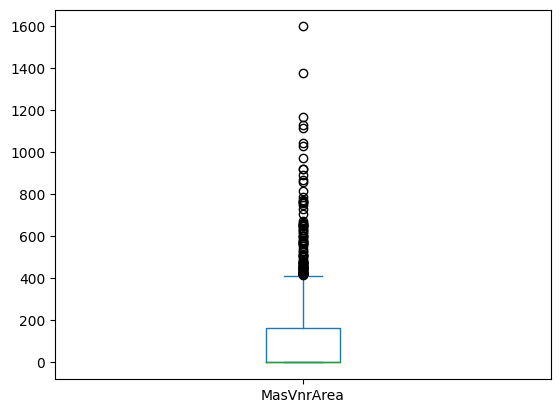

In [ ]:
house_data["MasVnrArea"].plot(kind="box")

<Axes: >

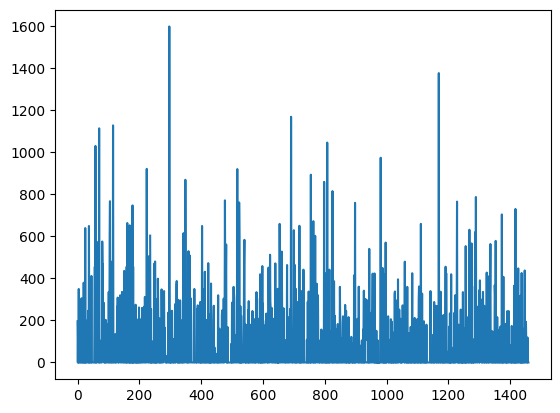

In [ ]:
house_data["MasVnrArea"].plot(kind="line")

In [ ]:
house_data["MasVnrArea"].describe()

count    1450.000000
mean      103.279310
std       180.254984
min         0.000000
25%         0.000000
50%         0.000000
75%       165.750000
max      1600.000000
Name: MasVnrArea, dtype: float64

on remplace les valeurs nulls par la median = le mode = 0

In [ ]:
house_data.fillna({"MasVnrArea":0.00},inplace=True)

In [ ]:
null_col=[]
null_var=house_data.isnull().sum().sort_values(ascending=False)
for i in range(len(house_data.columns)):
  if(null_var[i]!=0):
    null_col.append(null_var.index[i])
    print(null_var.index[i],"   :",null_var[i])

on a bien remplacer tout les valeurs manquantes

# **Encodage des variables categoriques**

In [ ]:
house_data_categorical = house_data.select_dtypes(include=[object, 'category', bool]).columns
house_data_categorical

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

voir les colonnes categorique binaires et utiliser le mapping avec 0 et 1

In [ ]:
for i in range(len(house_data_categorical)):
    print(house_data[house_data_categorical[i]].value_counts())

MSZoning
RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1452
Grvl       6
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     40
IR3      9
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      62
HLS      49
Low      36
Name: count, dtype: int64
Utilities
AllPub    1457
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1381
Mod      64
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype:

In [ ]:
import pandas as pd

house_data_binaire = pd.DataFrame()

for i in range(len(house_data_categorical)):
    if (len(house_data[house_data_categorical[i]].unique()) == 2):
        # Use pd.concat to concatenate columns
        house_data_binaire = pd.concat([house_data_binaire, house_data[house_data_categorical[i]]], axis=1)

house_data_binaire

,Street,Utilities,CentralAir
0,Pave,AllPub,Y
1,Pave,AllPub,Y
2,Pave,AllPub,Y
3,Pave,AllPub,Y
4,Pave,AllPub,Y
...,...,...,...
1455,Pave,AllPub,Y
1456,Pave,AllPub,Y
1457,Pave,AllPub,Y
1458,Pave,AllPub,Y


* "CentralAir" : un système de climatisation centralisée (Yes / No)

* "Utilities" : les services publics disponibles (All Public / pas accès à certains services)

* "Street" : le type de la rue (rues pavées / rues en gravier)

In [ ]:
centralair_mapping = {'Y': 1, 'N': 0}
utilities_mapping = {'AllPub': 1, 'NoSeWa': 0}
street_mapping = {'Pave': 1, 'Grvl': 0}

house_data['CentralAir'] = house_data['CentralAir'].map(centralair_mapping)
house_data['Utilities'] = house_data['Utilities'].map(utilities_mapping)
house_data['Street'] = house_data['Street'].map(street_mapping)

In [ ]:
house_data_categorical = house_data.select_dtypes(include=[object, 'category', bool]).columns
house_data_categorical

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

voir les colonnes ayant 3 valeurs uniques

In [ ]:
import pandas as pd

house_data_3 = pd.DataFrame()

for i in range(len(house_data_categorical)):
    if (len(house_data[house_data_categorical[i]].unique()) == 3):
        house_data_3 = pd.concat([house_data_3, house_data[house_data_categorical[i]]], axis=1)

for i in range(len(house_data_3.columns)):
    print(house_data[house_data_3.columns[i]].value_counts())

LandSlope
Gtl    1381
Mod      64
Sev      13
Name: count, dtype: int64
MasVnrType
BrkFace    1316
Stone       127
BrkCmn       15
Name: count, dtype: int64
GarageFinish
Unf    686
RFn    421
Fin    351
Name: count, dtype: int64
PavedDrive
Y    1338
N      90
P      30
Name: count, dtype: int64


- **LandSlope** : la pente du terrain.Gtl (Douce)/ Mod (Modérée) / Sev (Raide)

- **MasVnrType** : Type de revêtement en maçonnerie BrkFace (Brique Face) / Stone (Pierre) / BrkCmn (Brique Commune)

- **GarageFinish** : Niveau de finition du garage Unf (Non Fini) / RFn (Semi-Fini) / Fin (Fini)

- **PavedDrive** : Indique si l'allée est pavée Y (Oui) / N (Non) / P (Partiellement)

on utilise label encoder pour les colonnes : LandSlop, GarageFinish et PavedDrive car on a un ordre semantique

In [ ]:
LandSlope_mapping = {'Sev': 2 ,'Mod': 1, 'Gtl': 0}
PavedDrive_mapping = {'RFn': 2 ,'Fin': 1, 'Unf': 0}
GarageFinish_mapping = {'P': 2 ,'Y': 1, 'N': 0}

house_data['LandSlope'] = house_data['LandSlope'].map(LandSlope_mapping)
house_data['GarageFinish'] = house_data['GarageFinish'].map(GarageFinish_mapping)
house_data['PavedDrive'] = house_data['PavedDrive'].map(PavedDrive_mapping)

et on utilise one-hot encoder pour la colonne : MasVnrType

In [ ]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False, dtype=int)

encoded_array = onehot_encoder.fit_transform(house_data[['MasVnrType']])
encoded_columns = onehot_encoder.get_feature_names_out(['MasVnrType'])
house_data[encoded_columns] = encoded_array
house_data.drop(['MasVnrType'], axis=1, inplace=True)

house_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_Stone
0,1,60,RL,65.0,8450,1,Reg,Lvl,1,Inside,...,0,0,2,2008,WD,Normal,208500,0,1,0
1,2,20,RL,80.0,9600,1,Reg,Lvl,1,FR2,...,0,0,5,2007,WD,Normal,181500,0,1,0
2,3,60,RL,68.0,11250,1,IR1,Lvl,1,Inside,...,0,0,9,2008,WD,Normal,223500,0,1,0
3,4,70,RL,60.0,9550,1,IR1,Lvl,1,Corner,...,0,0,2,2006,WD,Abnorml,140000,0,1,0
4,5,60,RL,84.0,14260,1,IR1,Lvl,1,FR2,...,0,0,12,2008,WD,Normal,250000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,1,Reg,Lvl,1,Inside,...,0,0,8,2007,WD,Normal,175000,0,1,0
1456,1457,20,RL,85.0,13175,1,Reg,Lvl,1,Inside,...,0,0,2,2010,WD,Normal,210000,0,0,1
1457,1458,70,RL,66.0,9042,1,Reg,Lvl,1,Inside,...,0,2500,5,2010,WD,Normal,266500,0,1,0
1458,1459,20,RL,68.0,9717,1,Reg,Lvl,1,Inside,...,0,0,4,2010,WD,Normal,142125,0,1,0


In [ ]:
house_data_categorical = house_data.select_dtypes(include=[object, 'category', bool]).columns
house_data_categorical

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
import pandas as pd

house_data_4 = pd.DataFrame()

for i in range(len(house_data_categorical)):
    if (len(house_data[house_data_categorical[i]].unique()) ==4):
        house_data_4 = pd.concat([house_data_4, house_data[house_data_categorical[i]]], axis=1)

for i in range(len(house_data_4.columns)):
    print(house_data[house_data_4.columns[i]].value_counts())

LotShape
Reg    925
IR1    484
IR2     40
IR3      9
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      62
HLS      49
Low      36
Name: count, dtype: int64
ExterQual
TA    905
Gd    488
Ex     51
Fa     14
Name: count, dtype: int64
BsmtQual
TA    686
Gd    617
Ex    120
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1346
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    991
Av    221
Gd    132
Mn    114
Name: count, dtype: int64
KitchenQual
TA    735
Gd    585
Ex     99
Fa     39
Name: count, dtype: int64


- **LotShape** : Forme du terrain  Reg (Régulier) / IR1 (Irégulier 1) / IR2 (Irégulier 2) / IR3 (Irégulier 3)

- **LandContour** : Contour du terrain  Lvl (Plat) / Bnk (Surélevé) / HLS (Collines) / Low (Bas)

- **ExterQual** : Qualité extérieure de la maison  TA (Moyen/Standard) / Gd (Bonne) / Ex (Excellente) / Fa (Faible)

- **BsmtQual** : Qualité du sous-sol  TA (Moyen/Standard) / Gd (Bonne) / Ex (Excellente) / Fa (Faible)

- **BsmtCond** : Condition du sous-sol  TA (Moyen/Standard) / Gd (Bonne) / Fa (Faible) / Po (Pauvre)

- **BsmtExposure** : Niveau d'exposition du sous-sol (fenêtres, lumière naturelle) No (Aucune) / Av (Moyenne) / Gd (Bonne) / Mn (Minime)

- **KitchenQual** : Qualité de la cuisine  TA (Moyenne/Standard) / Gd (Bonne) / Ex (Excellente) / Fa (Faible)


on peut utiliser le label encoder pour tous ces colonnes


In [ ]:
LotShape_mapping = {'IR3': 3 ,'IR2': 2 ,'IR1': 1, 'Reg': 0}
LandContour_mapping = {'Bnk': 3 ,'HLS': 2 ,'Lvl': 1, 'Low': 0}
ExterQual_mapping = {'Ex': 3 ,'Gd': 2 ,'TA': 1, 'Fa': 0}
BsmtQual_mapping = {'Ex': 3 ,'Gd': 2 ,'TA': 1, 'Fa': 0}
BsmtCond_mapping = {'Gd': 3 ,'TA': 2, 'Fa': 1, 'Po':0}
BsmtExposure_mapping = {'Gd': 3 ,'Av': 2 ,'Mn': 1, 'No': 0}
KitchenQual_mapping = {'Ex': 3 ,'Gd': 2 ,'TA': 1, 'Fa': 0}


house_data['LotShape'] = house_data['LotShape'].map(LotShape_mapping)
house_data['LandContour'] = house_data['LandContour'].map(LandContour_mapping)
house_data['ExterQual'] = house_data['ExterQual'].map(ExterQual_mapping)
house_data['BsmtQual'] = house_data['BsmtQual'].map(BsmtQual_mapping)
house_data['BsmtCond'] = house_data['BsmtCond'].map(BsmtCond_mapping)
house_data['BsmtExposure'] = house_data['BsmtExposure'].map(BsmtExposure_mapping)
house_data['KitchenQual'] = house_data['KitchenQual'].map(KitchenQual_mapping)

In [ ]:
house_data_categorical = house_data.select_dtypes(include=[object, 'category', bool]).columns
house_data_categorical

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterCond', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'Electrical', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageQual', 'GarageCond', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
import pandas as pd

house_data_5 = pd.DataFrame()

for i in range(len(house_data_categorical)):
    if (len(house_data[house_data_categorical[i]].unique()) ==5):
        house_data_5 = pd.concat([house_data_5, house_data[house_data_categorical[i]]], axis=1)

for i in range(len(house_data_5.columns)):
    print(house_data[house_data_5.columns[i]].value_counts())

MSZoning
RL         1149
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
LotConfig
Inside     1051
Corner      262
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
BldgType
1Fam      1218
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64
ExterCond
TA    1280
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64
HeatingQC
Ex    739
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64
Electrical
SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64
FireplaceQu
Gd    1068
TA     313
Fa      33
Ex      24
Po      20
Name: count, dtype: int64
GarageQual
TA    1390
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1405
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


- **MSZoning** : Classification des zones résidentielles  RL (Résidentiel Low-Density) / RM (Résidentiel Medium-Density) / FV (Floating Village Residential) / RH (Résidentiel High-Density) / C (Commercial, toutes catégories)

- **LotConfig** : Configuration du lot  Inside(intérieur) / Corner / CulDSac(dans une impasse) / FR2 (Frontage sur deux rues) / FR3 (Frontage sur trois rues)

- **BldgType** : Type de construction  1Fam (Maison individuelle) / TwnhsE (Townhouse at End) / Duplex(pour deux familles) / Twnhs (Townhouse) / 2fmCon (Two-family Conversion)

- **ExterCond** : Condition extérieure de la maison  TA (Moyenne/Standard) / Gd (Bonne) / Fa (Faible) / Ex (Excellente) / Po (Pauvre)

- **HeatingQC** : Qualité du chauffage  TA (Moyenne/Standard) / Gd (Bonne) / Fa (Faible) / Ex (Excellente) / Po (Pauvre)

- **Electrical** : Type d'installation électrique  SBrkr (Standard Breaker) / FuseA (Fusible type A) / FuseF (Fusible type F) / FuseP (Fusible type P) / Mix

- **FireplaceQu** : Qualité de la cheminée TA (Moyenne/Standard) / Gd (Bonne) / Fa (Faible) / Ex (Excellente) / Po (Pauvre)

- **GarageQual** : Qualité du garage TA (Moyenne/Standard) / Gd (Bonne) / Fa (Faible) / Ex (Excellente) / Po (Pauvre)

- **GarageCond** : Condition du garage TA (Moyenne/Standard) / Gd (Bonne) / Fa (Faible) / Ex (Excellente) / Po (Pauvre)

on utilise le one-hot encoder pour les colonnes "LotConfig" , "BldgType" et "Electrical"

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False, dtype=int)

encoded_array = onehot_encoder.fit_transform(house_data[['LotConfig', 'BldgType', 'Electrical']])
encoded_columns = onehot_encoder.get_feature_names_out(['LotConfig', 'BldgType', 'Electrical'])
house_data[encoded_columns] = encoded_array
house_data.drop(['LotConfig', 'BldgType', 'Electrical'], axis=1, inplace=True)

house_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,...,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,1,60,RL,65.0,8450,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,20,RL,80.0,9600,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,5,60,RL,84.0,14260,1,1,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1456,1457,20,RL,85.0,13175,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1457,1458,70,RL,66.0,9042,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1458,1459,20,RL,68.0,9717,1,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0


et on utilise le mapping pour le rest

In [ ]:
mszoning_mapping = {'RL': 0, 'RM': 1, 'FV': 2, 'RH': 3, 'C (all)': 4}
extercond_mapping = {'Ex':4,'Gd': 3 ,'TA': 2, 'Fa': 1, 'Po':0}
heatingqc_mapping = {'Ex':4,'Gd': 3 ,'TA': 2, 'Fa': 1, 'Po':0}
fireplacequ_mapping = {'Ex':4,'Gd': 3 ,'TA': 2, 'Fa': 1, 'Po':0}
garagequal_mapping = {'Ex':4,'Gd': 3 ,'TA': 2, 'Fa': 1, 'Po':0}
garagecond_mapping = {'Ex':4,'Gd': 3 ,'TA': 2, 'Fa': 1, 'Po':0}

house_data['MSZoning'] = house_data['MSZoning'].map(mszoning_mapping)
house_data['ExterCond'] = house_data['ExterCond'].map(extercond_mapping)
house_data['HeatingQC'] = house_data['HeatingQC'].map(heatingqc_mapping)
house_data['FireplaceQu'] = house_data['FireplaceQu'].map(fireplacequ_mapping)
house_data['GarageQual'] = house_data['GarageQual'].map(garagequal_mapping)
house_data['GarageCond'] = house_data['GarageCond'].map(garagecond_mapping)


In [ ]:
house_data_categorical = house_data.select_dtypes(include=[object, 'category', bool]).columns
house_data_categorical

Index(['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'Functional', 'GarageType', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [ ]:
for i in range(len(house_data_categorical)):
    print(house_data[house_data_categorical[i]].value_counts())

Neighborhood
NAmes      224
CollgCr    150
OldTown    113
Edwards     99
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64
Condition1
Norm      1260
Feedr       80
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: count, dtype: int64
Condition2
Norm      1443
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
HouseStyle
1Story    725
2Story    444
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64
RoofStyle
Gable      1141
Hip         285
Flat         12
Gambrel      11
Mansard       7
Shed          2
Na

Les colonnes:
* HouseStyle [ de 1 story (1 étage) à 2.5 story (2.5 étages) ]
* Functional [ "Typ" (typique), "Min1", "Min2", "Mod", "Maj1", "Maj2", "Sev" ]
* BsmtFinType1 et BsmtFinType2 [ "GLQ" (Good Living Quarters) ou "ALQ" (Average Living Quarters) ] ont un ordre semantique

-> Donc on peut utiliser map pour les encoder

In [ ]:
house_style_mapping = {'1Story': 0, '2Story': 1, '1.5Fin': 2, 'SLvl': 3, 'SFoyer': 4, '1.5Unf': 5, '2.5Unf': 6, '2.5Fin': 7}
functional_mapping = {'Typ': 0, 'Min2': 1, 'Min1': 2, 'Mod': 3, 'Maj1': 4, 'Maj2': 5, 'Sev': 6}
bsmtfin_type1_mapping = {'Unf': 0, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5}

house_data['HouseStyle'] = house_data['HouseStyle'].map(house_style_mapping)
house_data['Functional'] = house_data['Functional'].map(functional_mapping)
house_data['BsmtFinType1'] = house_data['BsmtFinType1'].map(bsmtfin_type1_mapping)
house_data['BsmtFinType2'] = house_data['BsmtFinType2'].map(bsmtfin_type1_mapping)

Les autres colonnes ne suivent pas un ordre particulier

-> Donc on utilise one-hot encoder

In [ ]:
columns_to_onehot = ['Neighborhood', 'Condition1', 'Condition2', 'RoofStyle', 'RoofMatl','Exterior1st','Exterior2nd','Foundation','Heating','GarageType','SaleType', 'SaleCondition']

onehot_encoder = OneHotEncoder(sparse=False, dtype=int)
encoded_columns = onehot_encoder.fit_transform(house_data[columns_to_onehot])
encoded_column_names = onehot_encoder.get_feature_names_out(columns_to_onehot)


encoded_df = pd.DataFrame(encoded_columns, columns=encoded_column_names)
house_data = pd.concat([house_data, encoded_df], axis=1)

house_data.drop(columns_to_onehot, axis=1, inplace=True)
# De-fragment the DataFrame by creating a copy
house_data = house_data.copy()

house_data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,60.0,0.0,65.0,8450.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.0,20.0,0.0,80.0,9600.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,60.0,0.0,68.0,11250.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,70.0,0.0,60.0,9550.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5.0,60.0,0.0,84.0,14260.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458.0,70.0,0.0,66.0,9042.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1458,1459.0,20.0,0.0,68.0,9717.0,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,1460.0,20.0,0.0,75.0,9937.0,1.0,0.0,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
house_data_categorical = house_data.select_dtypes(include=[object, 'category', bool]).columns
house_data_categorical

Index([], dtype='object')

In [ ]:
for i in range(198):
  print(house_data.dtypes.index[i],house_data.dtypes[i])

On a bien pre processe la data
* Rechercher les doublons
* Gérer les valeurs manquantes
* Gérer les données catégoriques
* Valider les types de données

Pour que la data soit prête pour le traitement on peut normaliser ou standardiser les colonnes de valeur numerique continues.
